# **CVPS20 // Example: Rolling Average of Global Sea Level rise**

<i>September 22, 2020</i>

---

Working in groups, execute the cells below to pull data for the global sea level as a function of time from the National Oceanic and Atmospheric Administration's online database.

Then, plot the original sea level vs time as well as the sea level with a rolling mean filter applied (see `scipy.ndimage.filters`'s `uniform_filter`) with a width of **1 year** and with a width of **5 years**.

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (10, 5)

In [ ]:
def get_global_sealevel():
  """
  Return the global sea level time series with seasonal effects removed from
  NOAA's online database, https://www.star.nesdis.noaa.gov.

  Returns:
  -------
  yr_int : np.ndarray, float
    year

  sl_int : np.ndarray, float
    interpolated sea level in mm since 2000
  """

  # -- set the filename
  fname = "https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_gbl_free_txj1j2_90.csv"

  # -- read the csv
  data = pd.read_csv(fname, skiprows=5).values

  # -- calculate sea level
  sealev = np.nanmax(data[:, 1:], axis=1)

  # -- extract year
  year = data[:, 0]

  # -- linearly interpolate to every 0.02 year
  yr_int = np.arange(1993, 2020, 0.02)
  sl_int = np.interp(yr_int, year, sealev)

  return yr_int, sl_int


# -- run the function
year, sealev = get_global_sealevel()

In [ ]:
sealev

array([-17.63906977, -16.60299296, -19.28609155, ...,  65.63066176,
        65.27081181,  65.08852398])

In [ ]:
sealev.shape

(1350,)

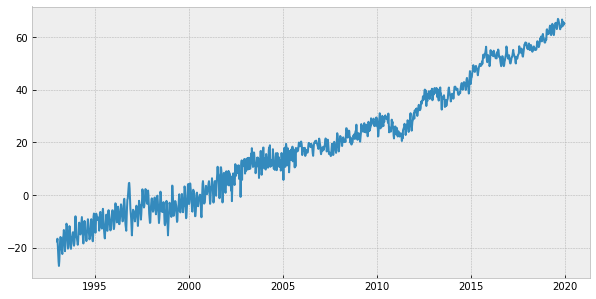

In [ ]:
plt.plot(year, sealev)

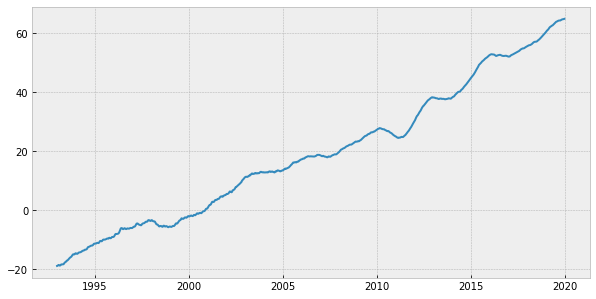

In [ ]:
from scipy import ndimage

sealevsmooth1 = ndimage.uniform_filter(sealev, size = 50)

fig, ax = plt.su

plt.plot(year, sealevsmooth1)

In [ ]:
sealevsmooth3.shape

(1350,)